# Dataset analysis
### 데이터 전처리 순서
### 1. 엑셀의 Vessel, Hemishphere별로 crop범위 지정
### 2. crop후 nnUNet에 맞는 형식 작성
### 3. nnUnet 2d, 3dfullres training 및 각각 inference
### 4. 2d에서 발견한 z축 슬라이스를 기본으로 하고, 2d 에서 발견된 z축 슬라이스의 최대 최소를 잡아 그 사이에 발견된 3dfullres z슬라이스를 추가하여 넣음
### 5. 앙상블한 ROI에서 각 vessel, Hemisphere 별로 발견된 2d distribution에서 벗어난 ROI들은 잘라냄
### 6. erosion, dilation 적용시켜 2,3차 제출에 사용한 다음 가장 정답에 맞는 ROI들을 선별하여 골라냄
### 7. 제출 


In [ ]:
# crop 범위 확인 코드


Vessel_1_Hemisphere_right


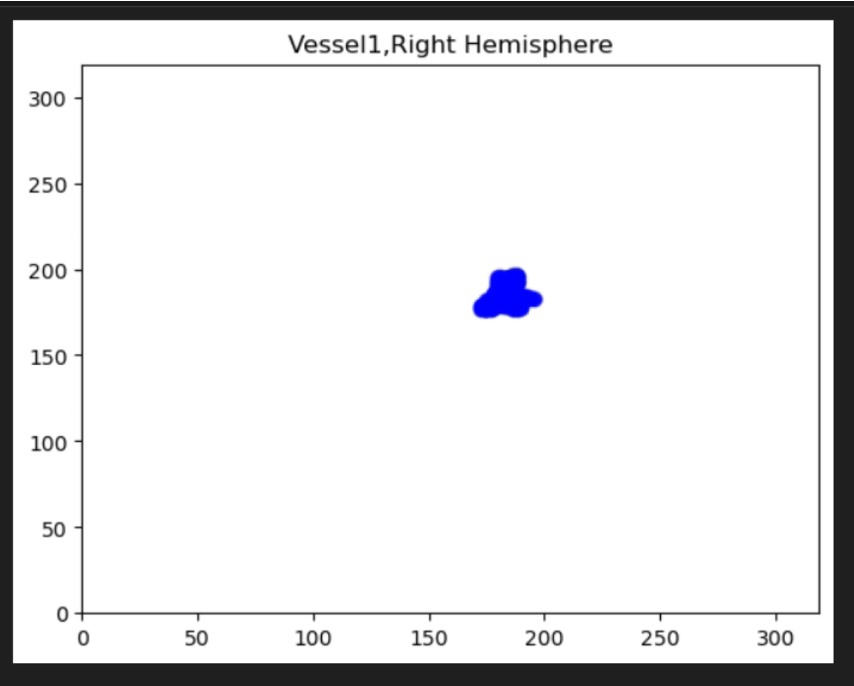

In [3]:
from IPython.display import Image
print('Vessel_1_Hemisphere_right')
Image(r'inference\asset\image (3).png')

Vessel_1_Hemisphere_right


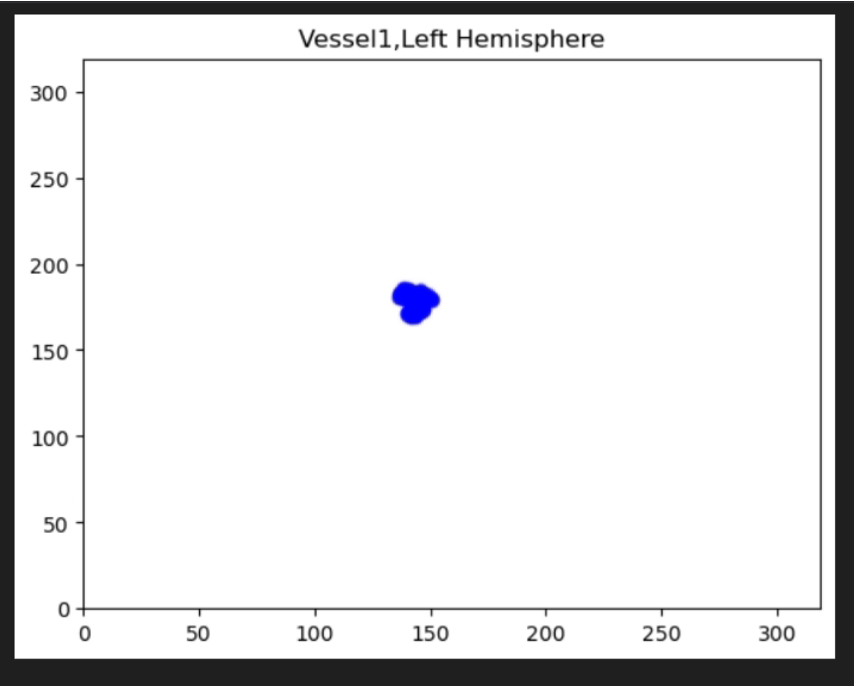

In [4]:
from IPython.display import Image
print('Vessel_1_Hemisphere_left')
Image(r'inference\asset\image (4).png')

Vessel_3_Hemisphere_left


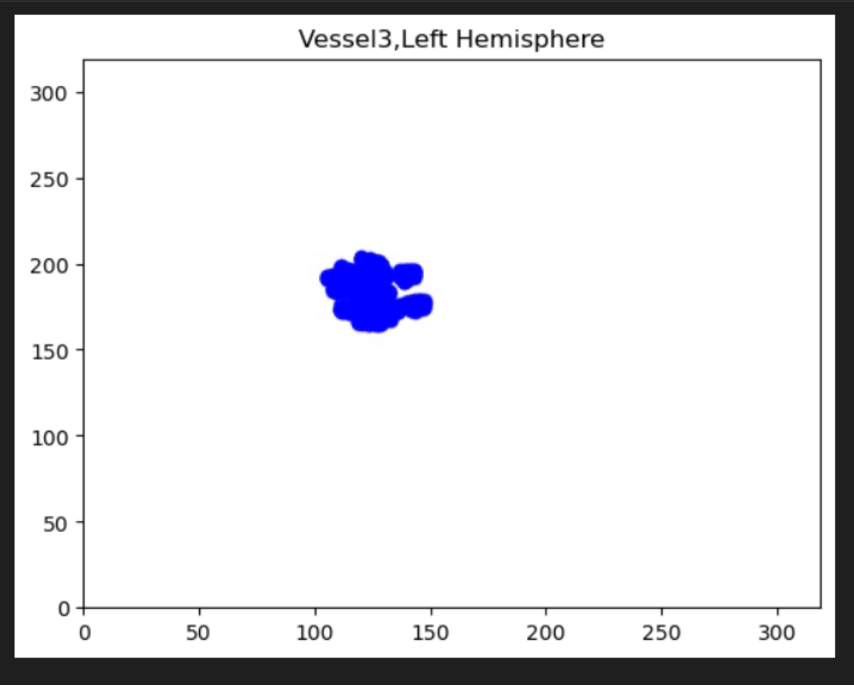

In [6]:
from IPython.display import Image
print('Vessel_3_Hemisphere_left')
Image(r'inference\asset\image (6).png')


Vessel_3_Hemisphere_right


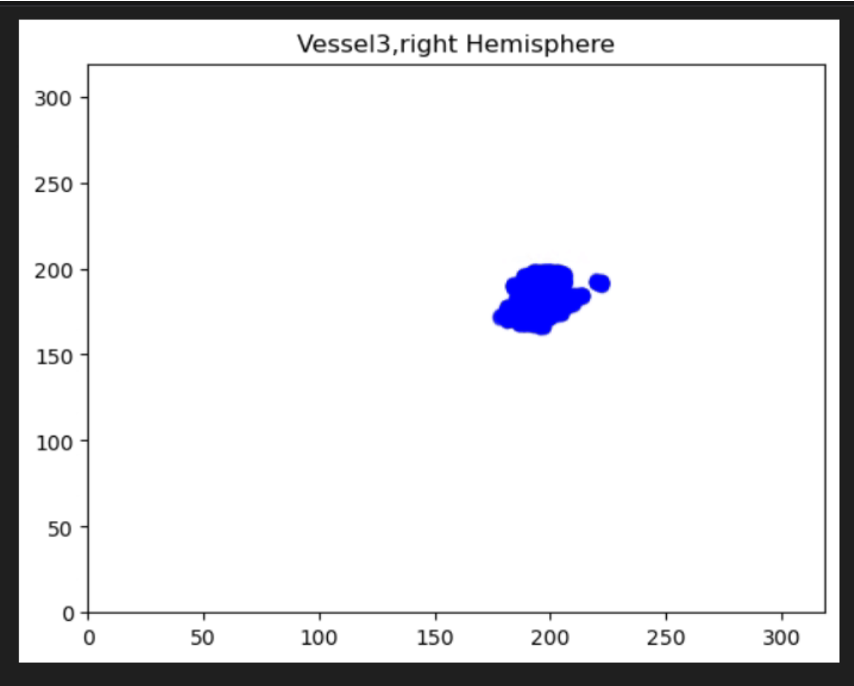

In [7]:
from IPython.display import Image
print('Vessel_3_Hemisphere_right')
Image(r'inference\asset\image (7).png')


Vessel_5_Hemisphere_middle


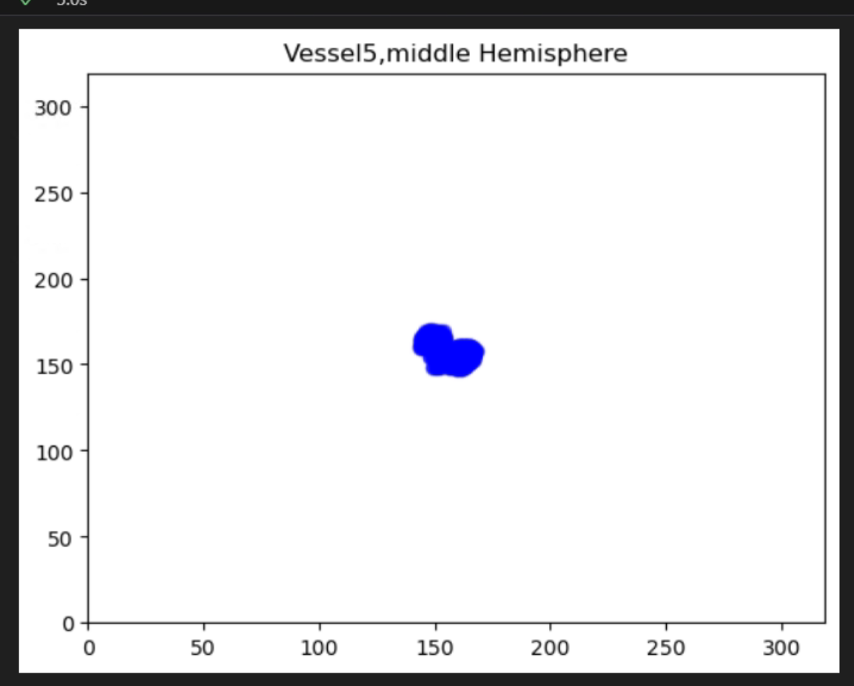

In [8]:
from IPython.display import Image
print('Vessel_5_Hemisphere_middle')
Image(r'inference\asset\image (8).png')


Vessel_6_Hemisphere_right


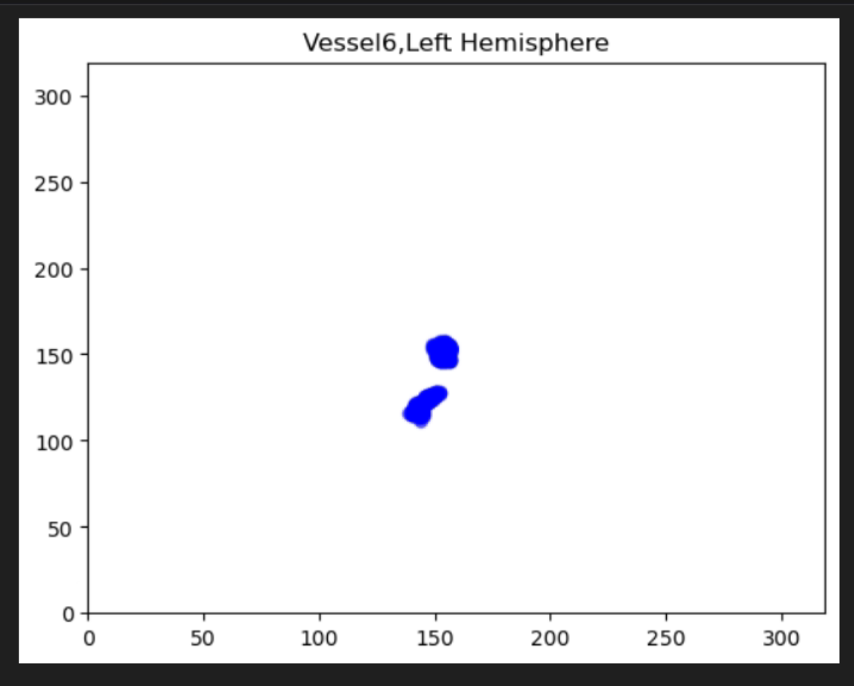

In [9]:
from IPython.display import Image
print('Vessel_6_Hemisphere_left')
Image(r'inference\asset\image (9).png')


Vessel_6_Hemisphere_right


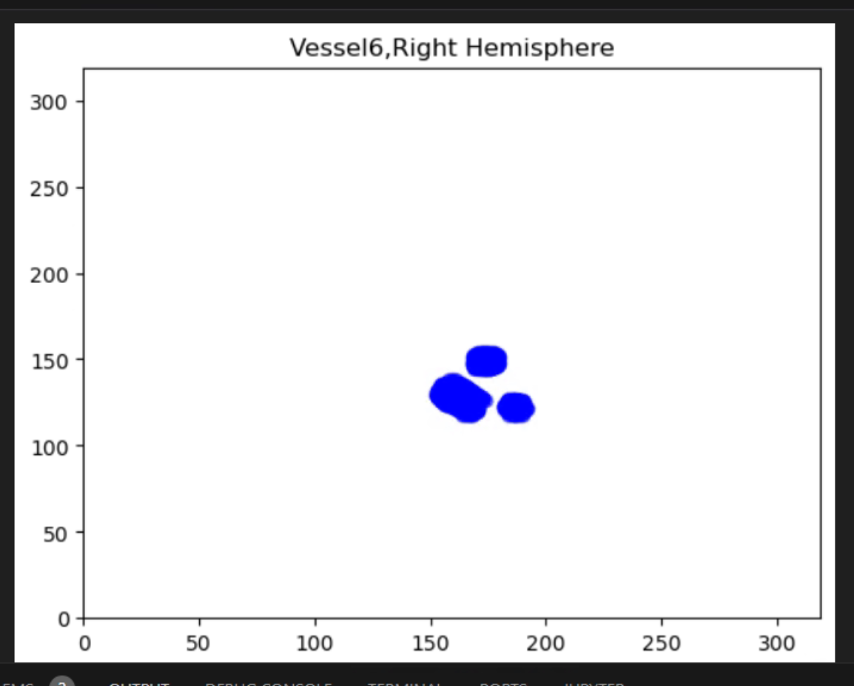

In [10]:
from IPython.display import Image
print('Vessel_6_Hemisphere_right')
Image(r'inference\asset\image (10).png')


In [ ]:
# crop 코드

## nnUNet 폴더는 다음과 같음
## nnUNet_raw, nnUNet_preprocessed, nnUNet_trained_model, nnUNet_results

### raw 폴더는 Dataset998_modified와 Dataset997_modified로 되어 있으며 998은 orginal image, 997은 crop image로 되어있음
### 각각 train code는 다음과 같음
### conda activate pytorch_env
### nnUNet_n_proc_DA=4 nnUNetv2_train 997 3d_fullres 5
### nnUNet_n_proc_DA=4 nnUNetv2_train 997 2d 5
### 그러면 result 폴더에 batch 5에 따른 폴더명이 생성되고, 결과가 기록됨
### test code는 다음과 같음
### nnUNetv2_predict -i /home/ncp/workspace/blockstorage/data/nnUNet_raw/Dataset997_modified/imageTs/imageTs -o /home/ncp/workspace/blockstorage/data/nnUNet_results/test_2d_result 3d_fullres -f 5 --save_probabilites
### nnUNetv2_predict -i /home/ncp/workspace/blockstorage/data/nnUNet_raw/Dataset997_modified/imageTs/imageTs -o /home/ncp/workspace/blockstorage/data/nnUNet_results/test_result 2d -f 5 --save_probabilites
### nnUNet 2d 결과는 가장 중요한 2d z slice를 찾는 것이고, 3d_fullres 의 결과는 2d 결과의 최대 최소 z축 슬라이스 내에 확률이 높은 z slice를 포함시키는 것임
### 



In [ ]:
# nnUNet 2d + 3d 결과 ensemble code


In [ ]:
# ensemble결과에서 위의 vessel hemisphere 별 crop 범위 외에 있는 roi 들을 삭제하는 코드


In [ ]:
# 결과에서 dilation, erosion을 적용하여 가장 최적의 roi를 구하는 코드


In [ ]:
# 제출